# Исследование компьютерной игры 

**Цель исследования** — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Необходимо провсти исследовательский анализ:
1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Как менялись продажи по платформам. Для платформ с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Какие платформы лидируют по продажам, растут или падают? 
4. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опиать результат.
5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
6. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
7. Необходимо составить портрет пользователя каждого региона

Необходимо проверить гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**Описание проекта**

Заказчик — интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Нужно выявить определяющие успешность игры закономерности. Результаты исследования позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Данны данные до 2016 года и я планирую кампанию на 2017-й. Я проверю данные на ошибки и оценю их влияние на исследование. Затем, на этапе предобработки буду искать возможность исправить самые критичные ошибки данных.
 
Таким образом, исследование пройдёт в четыре этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследовательский анализ.
 4. Проверка гипотез.
 
## Описание данных

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Обозначение рейтинга в столбце `Rating`:**
* `E` - для всех;
* `M` - для взрослых (от 17 лет и старше);
* `T` - для подростков (от 13 лет и старше);
* `E10+` - для всех (от 10 лет и старше);
* `K-A` - для детей и взрослых. Этот рейтинг использовался до 1998 года, когда он был переименован в E.
* `AO` - для взрослых (от 18 лет и старше);
* `EC` - для детей младшего возраста (от 3 лет и старше);
* `RP` - рейтинг ожидается. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

## Обзор данных

### Открыть файл с данными и изучить общую информацию

Импортирую библиотеки.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

# импорт библиотеки warnings
import warnings
warnings.filterwarnings('ignore')

# задам точность отображения данных типа float (2 знака после запятой)
pd.options.display.float_format = '{:.2f}'.format

Считываю данные из файла games.csv и сохраню их в датафрейм data.

In [2]:
import os

pth1 = '/datasets/games.csv' 
pth2 = 'https://code.s3.yandex.net/datasets/games.csv' 

if os.path.exists(pth1):
    data = pd.read_csv(pth1) 
elif os.path.exists(pth2):
    data = pd.read_csv(pth2) 
else:
    print('Something is wrong')

Выведу первые 10 строчек датафрейма на экран, чтобы ознакомиться с данными, проверить нужные ли данные были загружены.

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выведe основную информацию о датафрейме.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов и 16715 строки: 
- 6 столбцов - тип данных float;
- 5 столбцов - тип данных object.

1. Названия столбцов необходимо привести к нижнему регистру.

2. У столбца `User_Score` тип данных object , когда в нем записаны числа, с этим надо будет поработать и изменить тип данных. В столбце `Year_of_Release` записан год выпуска с типом данных float, хотя информация соответствует типу данных datetime, поэтому изменю тип данных в этом столбце. Тип данных остальных столбцов вполне соответствует действительности. 

3. Видно, что во многих столбцах есть пропуски данных, причем где то пропущено всего несколько значений, а где - то несколько тысяча пропусков, с ними буду работать дальше. 

Согласно документации к данным:
Описание данных
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Построю общую гистограмму для всех числовых столбцов таблицы.

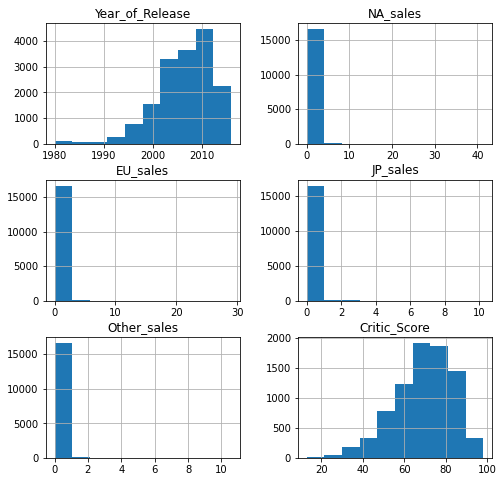

In [5]:
data.hist(figsize=(8, 8));

В столбцах с продажами много околонулевых или нулевых значений, хотя пропусков в этих данных нет, с этим следует разобраться. Остальные столбцы следует рассмотреть более детально.

### Предобработка данных

#### Переименование столбцов

In [6]:
data = data.rename(str.lower, axis='columns')

In [7]:
# проверка, как изменились названия столбцов
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Удаление пропусков

Выведу долю пропущенных значений для каждого столбца. Так мы увидим, что можно отбросить, а с чем надо работать. 

In [8]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(2).background_gradient('coolwarm')

,0
name,0.01
platform,0.00
year_of_release,1.61
genre,0.01
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.32
user_score,40.09


В столбцах `name` и `genre` пропущено менее 1% данных. В столбце `year_of_release` пропущено менее 2% данных. Строки с пропусками можно удалить, тогда в датафрейме сохранится достаточное количество информации.

В столбце `user_score` и `rating` пропущено примерно 41% данных, а в столбце `critic_score` - 51%. Изучу по отдельности каждый столбец с пропусками.

В столбце `year_of_release` удалю строки с пропусками.

In [9]:
data = data.dropna(subset=['year_of_release', 'name', 'genre'])

Рассмотрю уникальные значения в столбце `user_score`.

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце `user_score` кроме пропусков видно странное значение 'tbd', вероятно, так записано отсутствие информации. Визуализирую количество уникальных значений и построю столбиковую диаграмму.

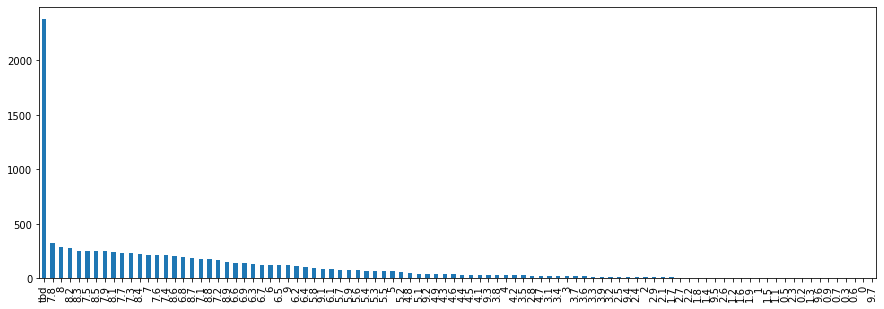

In [11]:
data['user_score'].value_counts().plot(kind='bar', figsize=(15, 5));

Значений 'tbd' много, а также вероятно, что таким образом записано отсутствие информации. Раз информации нет, то заменю 'tbd' на пустые строки. Сами пустые строки удалять или заполнять не буду. Удаление приведет к потере большого объема данных, а заполнение пропусков может привести к искажению информации. 

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [13]:
# проверю уникальные значения

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Замена прошла успешно.

Далее обработаю пропуски в столбце `critic_score`. Выведу еще раз долю пропусков.

In [14]:
pd.DataFrame(data.isna().mean()*100).style.set_precision(2).background_gradient('coolwarm')

,0
name,0.00
platform,0.00
year_of_release,0.00
genre,0.00
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.45
user_score,54.62


В целом в столбце `critic_score` пропущено почти половина данных. Удалять такие строки точно нельзя. Можно заполнить медианным значением в зависимости от како-то параметра, например, жанра или названия игры/платформы, но вероятно тогда исказятся результаты, что скажется на дальнейшем анализе. Поэтому просто оставлю строки пустыми.

Далее обработаю пропуски в столбце `rating`. Выведу уникальные значения.

In [15]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Всего выделено 8 категорий рейтинга. Так как есть пропуски в столбце рейтинга, то выведу первые 15 строк и изучу их.

In [16]:
data.query('rating.isna()').head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.00,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.00,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.00,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.00,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.00,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


Значение рейтинга отсутствует у игр разных жанров и выпущенные в разные года. Так как пропущено почти 41% данных, то удалять строки нельзя. Вероятно пропуски связаны с отсутствием рейтинга или его еще не присвоили. Заменю пропуски значением `unknown`

In [17]:
data.loc[data['rating'].isna(), 'rating'] = 'unknown'


Рейтинг ESRB предназначен для маркировки игр для США и Канады. И логично, что для других регионов он не заполняется, соответственно по заглушке 'unknown' будут выделяться эти регионы.

In [18]:
# проверка уникальных значений

data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [19]:
# проверка на налиие пропусков

pd.DataFrame(data.isna().mean()*100).style.set_precision(2).background_gradient('coolwarm')

,0
name,0.00
platform,0.00
year_of_release,0.00
genre,0.00
na_sales,0.00
eu_sales,0.00
jp_sales,0.00
other_sales,0.00
critic_score,51.45
user_score,54.62


Где могла пропуски обработала. Приступаю к следующиему этапу предобработки данных.

#### Преобразование типов данных

В столбце `year_of_release` заменю тип данных float на int так как год отображается в целых числах. В столбце `user_score` заменю тип данных столбца на float. 

In [20]:
data['user_score'] = data['user_score'].astype(float)

In [21]:
data['year_of_release'] = data['year_of_release'].astype(int)

Выведу общую информацию о датафрейме и посмотрю как изменилась информация

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Информация отображается корректно.

#### Исследование аномальных значений

Выведу описательную статистику столбцов.

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year_of_release,16444.00,2006.49,5.88,1980.00,2003.00,2007.00,2010.00,2016.00
na_sales,16444.00,0.26,0.82,0.00,0.00,0.08,0.24,41.36
eu_sales,16444.00,0.15,0.51,0.00,0.00,0.02,0.11,28.96
jp_sales,16444.00,0.08,0.31,0.00,0.00,0.00,0.04,10.22
other_sales,16444.00,0.05,0.19,0.00,0.00,0.01,0.03,10.57
critic_score,7983.00,68.99,13.92,13.00,60.00,71.00,79.00,98.00
user_score,7463.00,7.13,1.50,0.00,6.40,7.50,8.20,9.70


В целом в данных нет выбросов. В столбце `user_score` минимальное значение -1, однако это флаг, который я создала при обработке пропусков. Стандартное отклонение тоже не наводит на наличие выбросов.

#### Исследование дубликатов

Сначала проверю наличие явных дубликатов.

In [24]:
data.duplicated().sum()

0

Явных дубликатов нет, осталось проверить неявные. Они могут быть спрятаны в столбцах `name`, `platform`, `genre`. Сначала выведу уникальные значения для каждого столбца и изучу их.

In [25]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [26]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [27]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

В столбцах `platform`, `genre` дубликатов не выявлено. В столбце `name` слишком много уникальных значений. 
Сначала в столбце `name` приведу все записи к нижнему регистру, затем проверю наличие дубликатов.

In [28]:
data['name'] = data['name'].str.lower()

In [29]:
data['name'].value_counts().head(30)

need for speed: most wanted                      12
ratatouille                                       9
fifa 14                                           9
lego marvel super heroes                          9
lego the hobbit                                   8
fifa 15                                           8
terraria                                          8
fifa soccer 13                                    8
angry birds star wars                             8
monopoly                                          8
madden nfl 07                                     8
lego jurassic world                               8
lego star wars ii: the original trilogy           8
madden nfl 08                                     8
the lego movie videogame                          8
cars                                              8
lego batman 3: beyond gotham                      8
the sims 2                                        7
fifa soccer 08                                    7
major league

In [30]:
data.duplicated().sum()

0

Дубликатов в данных не обнаружено

#### Посчитаю суммарные продажи во всех регионах и запишите их в отдельный столбец.

Создам столбец `total_sales`, в который сохраню суммарные продажи во всех регионах.

In [31]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales'] 

Выведу первые строки датафрейма и проверю новый столбец.

In [32]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8.00,E,82.54
1,super mario bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,mario kart wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.30,E,35.52
3,wii sports resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8.00,E,32.77
4,pokemon red/pokemon blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


In [33]:
# Комментарий ревьюера
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' beyblade burst' ' fire emblem fates' " frozen: olaf's quest" ...
 'zwei!!' 'zyuden sentai kyoryuger: game de gaburincho!!'
 '¡shin chan flipa en c

**Вывод**

Во время предобработки данных:

1. Названия всех столбцов приведены к нижнему регистру;

2. В столбцах `year_of_release`, `name`, `genre` были удалены строки с пропусками. Таких строк было меньше 1-2%, поэтому их удаление допустимо;

3. В столбце `user_score` значение 'tbd' заменено на пустую строку. Пропуски в этом столбце не удалялись;

4. В столбце `critic_score` пропуски были оставлены;

5. В столбце `rating` пропуски заменены значением-флагом `unknown`;

6. В столбце `year_of_release` заменен тип данных float на int;

7. В столбце `user_score` заменен тип данных на float;

8. Создан столбец `total_sales` со значениями суммарных продаж во всех регионах.

Аномалий и дубликатов не выявлено.

### Исследовательский анализ данных

1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Как менялись продажи по платформам. Для платформ с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Какие платформы лидируют по продажам, растут или падают? 
4. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опиать результат.
5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
6. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
7. Необходимо составить портрет пользователя каждого региона

#### Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

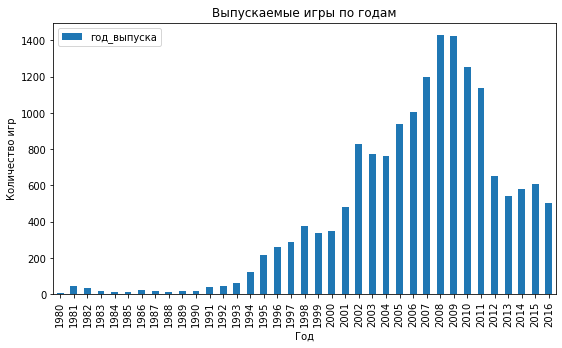

In [34]:
data.groupby('year_of_release').agg(год_выпуска=('year_of_release', 'count'))\
     .plot(kind='bar', figsize=(9, 5), 
      title='Выпускаемые игры по годам',
      ylabel='Количество игр',
      xlabel='Год');

Наибольшее количество игр выпускалось за период 2001 - 2016. Менее 200 игр было выпущено за период 1980 - 1995 г. Таким образом, наиболее важные данные за период начиная с 2001 года.

Цель исследования - спланировать рекламную компанию на 2017 год на основе данных за предыдущие года. Поэтому для анализа тенденции продаж в основном будут рассматриваться данные за последние 2 года, а также за последние 4 года, то есть с 2012 года по 2016 год.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Сначала изучу суммарные продажи платформ за весь период. Для этого построю гистограмму.

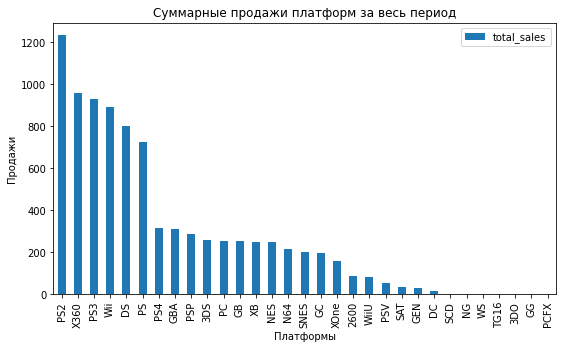

In [35]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
    .sort_values(by='total_sales', ascending=False) \
    .plot(kind='bar', figsize=(9, 5),
          title='Суммарные продажи платформ за весь период',
          ylabel='Продажи',
          xlabel='Платформы');

ТОП-5 продаж за все время у платформ: PS2, X360, PS3, Wii, DS.

Далее для платформ с максимальными продажами посмотрю их распределение по годам.

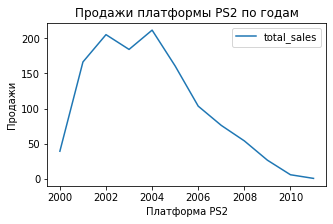

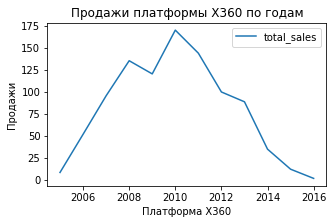

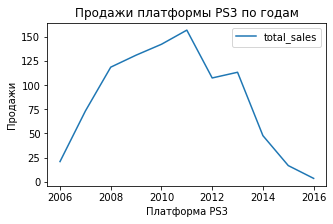

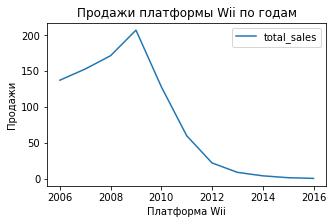

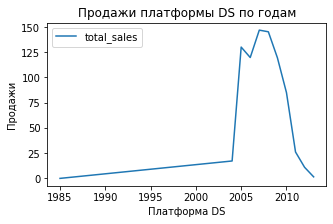

In [36]:
top_5 = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

for t in top_5:
    data.query('platform == @t') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(kind='line', figsize=(5, 3),
          title=f'Продажи платформы {t} по годам',
          ylabel='Продажи',
          xlabel=f'Платформа {t}');


На графике видно странное значение величины продаж платформы DS за 1985 год. При анализе в интеренете, было выявлено, что эта платформа была выпущена в 2004 году, а значит значение в датафрейме явно ошибочное. Посмотрю сколько строк с неправильным годом выпуска DS.

  

</div>

In [37]:
# новый код студента
data.query('platform == "DS" and year_of_release < 2004')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,strongest tokyo university shogi ds,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02




В датафрейме всего одна строка с некорректным значением, поэтому я удалю ее и еще раз построю гистограмму распределения по годам для платформ с максимальными продажами.

  

</div>

In [38]:
# новый код студента
data = data.drop (index= 15957 )

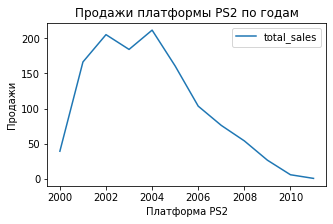

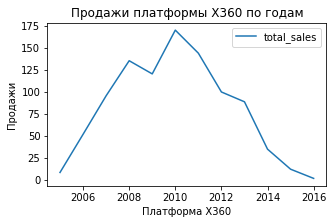

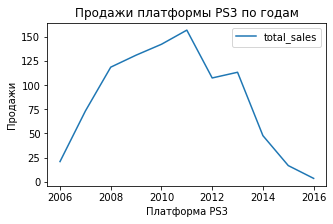

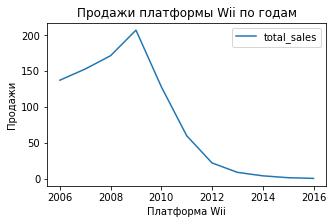

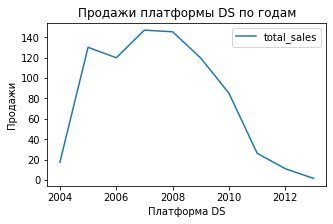

In [39]:
# новый код студента
top_5 = ['PS2', 'X360', 'PS3', 'Wii', 'DS']
for t in top_5:
    data.query('platform == @t') \
    .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
    .plot(kind='line', figsize=(5, 3),
          title=f'Продажи платформы {t} по годам',
          ylabel='Продажи',
          xlabel=f'Платформа {t}');

ИТОГО:
- платформа `PS2` была в продаже за период 2000 - 2010 год, 
- платформа `X360` была в продаже за период 2006 - 2016 год, 
- платформа `PS3` была в продаже за период 2006 - 2016 год, 
- платформа `Wii` была в продаже за период 2006 - 2016 год, 
- платформа `DS` была в продаже за период 1985 - 2010 год.

Таким образом, платформы PS2 и DS вышли из продажи после 2010 года. Вероятно PS2 сменила более современная версия PS3, выпущеная в продажу в 2006 году. В целом одна платформа может успешно продаваться в течении 10-25 лет.


#### Далее для анализа возьму данные за соответствующий актуальный период. 



В динамично меняющейся индустрии компьютерных игр для прогноза продаж логичнее взять интервал за последние 4 года, то есть с 2013 года по 2016 год. Для этого построю гистограмму. 
    
Предварительно создам новый датафрейм `data_actual` со срезом данных за 2013-2016 год.

  

</div>

In [40]:
data_actual = data.query('year_of_release.between(2013, 2016, inclusive="both")')

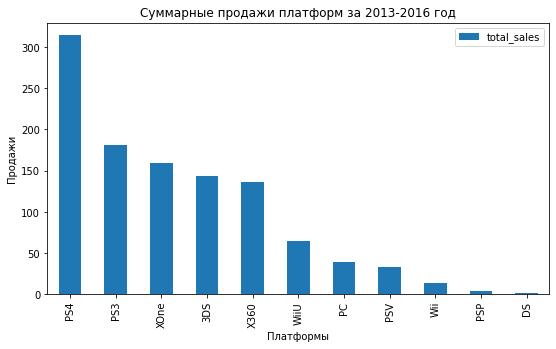

In [41]:
data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
    .sort_values(by='total_sales', ascending=False) \
    .plot(kind='bar', figsize=(9, 5),
          title='Суммарные продажи платформ за 2013-2016 год',
          ylabel='Продажи',
          xlabel='Платформы');



За период с 2013 года по 2016 год ТОП-5 продаж у платформ: PS4, PS3, XOne, 3DS, X360. Далее посмотрим распределение продаж отдельно по годам для каждой из этих платформ.
  

</div>

In [42]:
# создам переменную с самыми продаваемыми платформами
platform_top_sales = data_actual.pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                                .sort_values(by='total_sales', ascending=False) \
                                .head(5).index

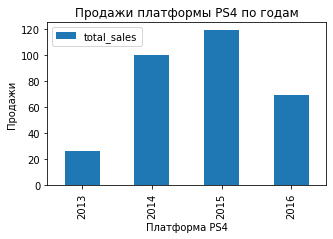

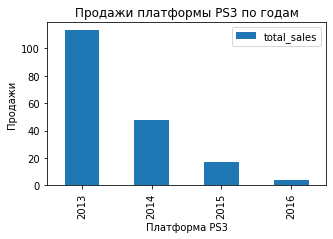

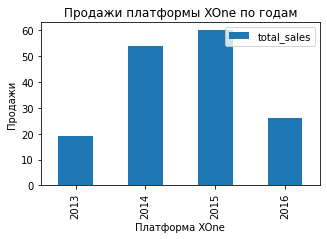

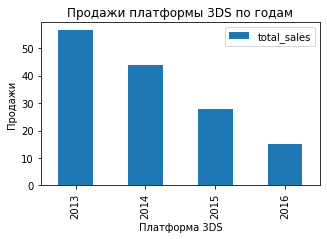

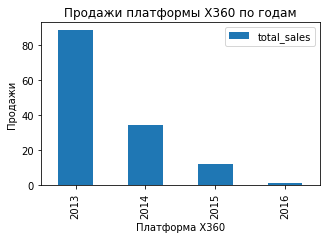

In [43]:
for t in platform_top_sales:
    data_actual.query('platform == @t') \
                .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum') \
                .plot(kind='bar', figsize=(5, 3),
                      title=f'Продажи платформы {t} по годам',
                      ylabel='Продажи',
                      xlabel=f'Платформа {t}');

За период с 2013 года по 2016 год ТОП-5 продаж у платформ: PS4, PS3, XOne, 3DS, X360. 
    
У платформы PS4 до 2015 года был рост продаж, а в 2016 году спад. Этот спад можно связать с неполнотой данных за 2016 год, а значит что тенденция роста продаж с 2013 по 2015 год вероятно сохранится и на следующие года. Аналогичная ситуация у платформы XOne. А у PS3, 3DS и X360 наоборот, хоть в целом по продажам они и лидируют, но основные продажи были сделаны в 2013 году, а далее их величина сильно падает. Среди этих трех платформ большие продажи у 3DS, поэтому на нее стоит также обратить внимание при прогнозе на 2017 год.
  
**Вывод:**

Для прогноза рекламной компании лучше ориентироватеься на наиболее продаваемые платформы за 2013-2016 года: PS4, XOne. Также можно рассматривать платформу 3DS, однако ее показатели будут хуже чем у PS4, XOne

</div>



#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат

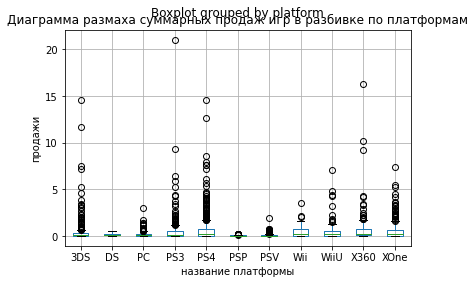

In [44]:
data_actual.boxplot(column=['total_sales'], by='platform');
plt.xlabel('название платформы');
plt.ylabel('продажи');
plt.title('Диаграмма размаха суммарных продаж игр в разбивке по платформам');

На общей диаграмме размаха видно, что для каждой платформы есть аномально высокие суммарные продажи, то есть выбросы. Это могут быть значения в первые годы выхода платформ, когда они были только популярны.

Однако с таким масштабом не видно медианные значения, а также 1-3 квартили, поэтому я построю еще одну диаграмму с увеличенным масштабом.

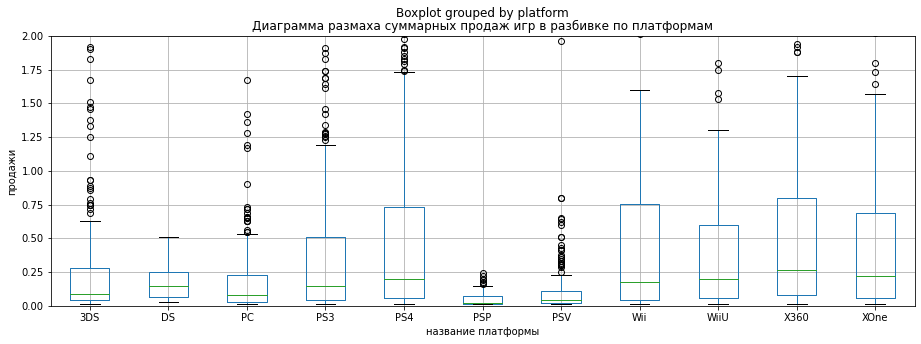

In [68]:
data_actual.boxplot(column=['total_sales'], by='platform', figsize=(15,5));

plt.ylim(0, 2)
plt.xlabel('название платформы');
plt.ylabel('продажи');
plt.title('Диаграмма размаха суммарных продаж игр в разбивке по платформам');

В целом по всем платформам наблюдается положительная скошенность данных. Наибольшая скошенность у самых продающихся платформ: PS3, PS4, X360, Wii, XOne. 

**Вывод:**

Медианная величина продаж наибольшая у платформы X360, XOne, WiiU, PS3 и PS4. Увсех данных имеется положительная скошенность, а также выбросы.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Наиболее продаваемая платформа - PS4. Поэтому именно для этой платформы я буду исследовать как влияют на ее продажи  отзывы пользователей и критиков. При этом исследование буду проводить за период с 2012 года по 2016 год, как наиболее актуальный период.

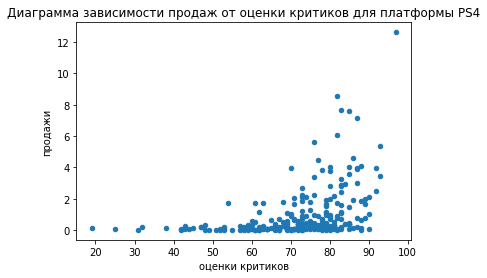

In [46]:
# строю диаграмму рассеяния для зависимости продаж от оценки критиков

data_actual.query('platform == "PS4"') \
            .plot(x='critic_score', y='total_sales', kind='scatter', 
                    title='Диаграмма зависимости продаж от оценки критиков для платформы PS4',
                    xlabel='оценки критиков',
                    ylabel='продажи');

На диаграмме прослеживается небольшая взаимосвязь между продажами и оценками критиков. Проверим вывод и посчитаю коэффициент корреляции.


In [47]:
print('Коэффициент корреляции между продажами и оценками критиков для платформы PS4:', \
round(data_actual.query('platform == "PS4"')['critic_score']\
    .corr(data_actual.query('platform == "PS4"')['total_sales']), 1))

Коэффициент корреляции между продажами и оценками критиков для платформы PS4: 0.4


Коэффициент корреляции между продажами и оценками критиков для платформы PS4 равен 0.4, связь между переменными умеренная.

Теперь построю диаграмму рассеяния для оценки зависимости продаж от оценки пользователей.

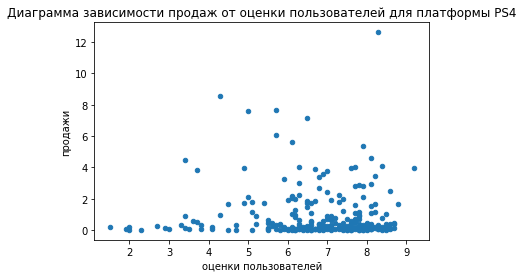

In [48]:
# строю диаграмму рассеяния для зависимости продаж от оценки пользователей
data_actual.query('platform == "PS4"') \
    .plot(x='user_score', y='total_sales', kind='scatter', 
        title='Диаграмма зависимости продаж от оценки пользователей для платформы PS4',
        xlabel='оценки пользователей',
        ylabel='продажи');

На диаграмме не прослеживается  взаимосвязь между продажами и оценками пользователей. Проверю этот вывод и посчитаю коэффициент корреляции.

In [49]:
print('Коэффициент корреляции между между продажами и оценками пользователей для платформы PS4:', \
      round(data_actual.query('platform == "PS4"')['user_score']\
                       .corr(data_actual.query('platform == "PS4"')['total_sales']), 1))

Коэффициент корреляции между между продажами и оценками пользователей для платформы PS4: -0.0


Коэффициент корреляции между продажами и оценками пользователей для платформы PS4 близко к нулю, да еще и отрицательный, взаимосвязи нет.

**Вывод:**

Выявлена умеренная взаимосвязь между продажами и оценками критиков для платформы PS4. Значит отзывы критиков могут частично повлиять на продажи платформы. Однако, также выявлено, что отзывы пользователей не влияют на продажи.

#### Соотнесите выводы с продажами игр на других платформах.

Для исследования выводов о прожадах на других платформах сначала определю топ-5 продаваемых платформ за 2012-2016 год за исключением PS4. Далее зависимость будет определяться именно для этих платформ.

In [50]:
# определяю топ-5 платформ
top_platform = data_actual.query('platform != "PS4"')\
                          .pivot_table(index='platform', values='total_sales', aggfunc='sum') \
                          .sort_values(by='total_sales', ascending=False).head(5).index

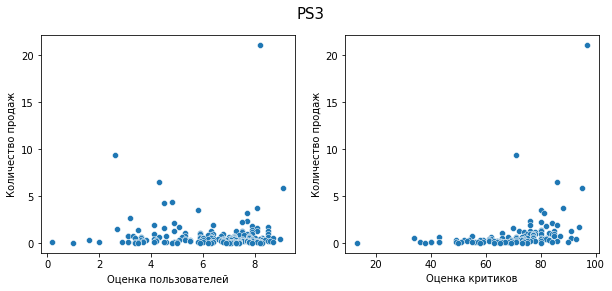

Платформа PS3 :
Корреляция между продажами и рейтингом критиков 0.33
Корреляция между продажами и оценками пользователей 0.0


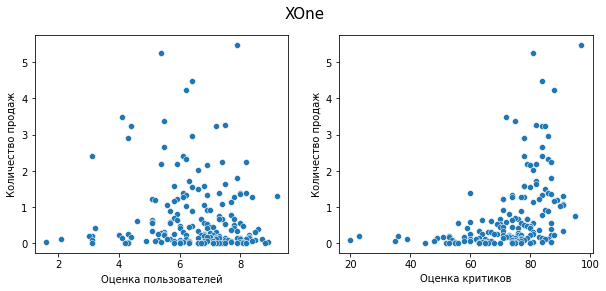

Платформа XOne :
Корреляция между продажами и рейтингом критиков 0.42
Корреляция между продажами и оценками пользователей -0.07


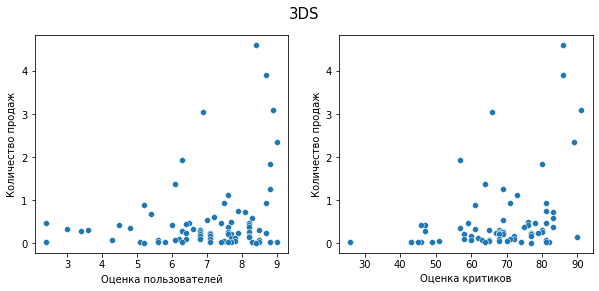

Платформа 3DS :
Корреляция между продажами и рейтингом критиков 0.36
Корреляция между продажами и оценками пользователей 0.24


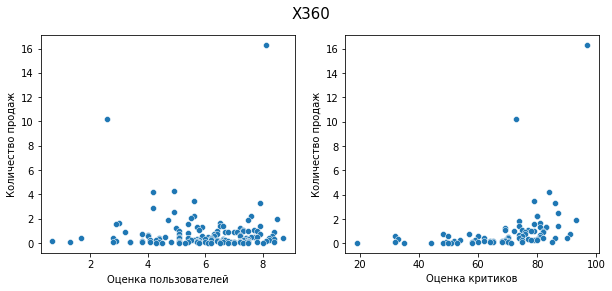

Платформа X360 :
Корреляция между продажами и рейтингом критиков 0.35
Корреляция между продажами и оценками пользователей -0.01


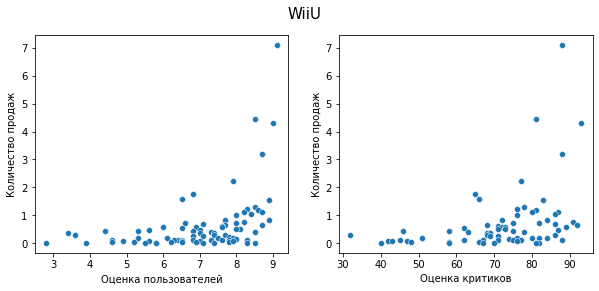

Платформа WiiU :
Корреляция между продажами и рейтингом критиков 0.38
Корреляция между продажами и оценками пользователей 0.42


In [51]:
for t in top_platform:  
    fig, ax = plt.subplots(1 ,2, figsize=(10,4))
    pl = data_actual.query('platform == @t')
    sns.scatterplot(x='user_score', y='total_sales', data=pl, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=pl, ax=ax[1])
    fig.suptitle(t, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    print('Платформа',t,':')
    print('Корреляция между продажами и рейтингом критиков', pl['total_sales'].corr(data_actual['critic_score']).round(2))
    print('Корреляция между продажами и оценками пользователей', pl['total_sales'].corr(data_actual['user_score']).round(2))

Коэффициент корреляции между продажами и оценками критиков для других платформ также соответствует умеренной взаимосвязи как и для PS4. Значит, отзывы критиков положительно влияют на продажи платформы.

Для других платформ также как и для PS4 не выявлена взаимосвязь между продажами и оценками пользователей
Далее изучу взаимосвязь для оценок пользователей. Построю гистограмму рассеяния и посчитаю коэффициент корреляции.Вывод подтвердился. Оценки пользователей не влияют на продаваемость платформ. Исключение - платформа WiiU с умеренной корреляцией.

**Вывод:**

В целом выводы подтвердились:

1) Отзывы критиков положительно но влияют на продажи платформы. Чем выше оценка криика, тем лучше продаетя платформа;
2) Оценки пользователей не влияют на продаваемость платформ

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Построю гистограмму распределения игр по жанрам.

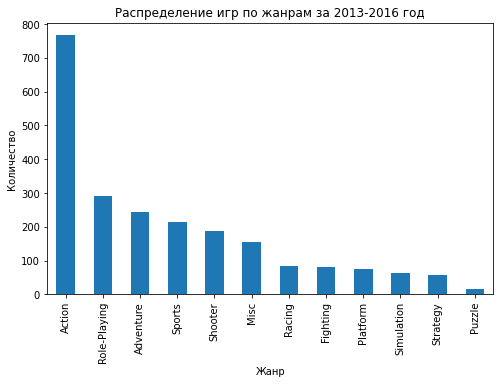

In [52]:
data_actual['genre'].value_counts().sort_values(ascending=False)\
                    .plot(kind='bar', figsize=(8, 5),
                          title='Распределение игр по жанрам за 2013-2016 год',
                          xlabel='Жанр',
                          ylabel='Количество');


Наиболее популярные жанры игр: Action(боевик), Role-Playing (ролевые), Adventure (приключения), Sports(Спортивный симулятор), Shooter(стрелялка). Количество игр боевиков в разы больше чем остальных жанров. 

Далее изучу продажи в зависимости от жанра игры для актуального периода 2013-2016 год. 
</div>



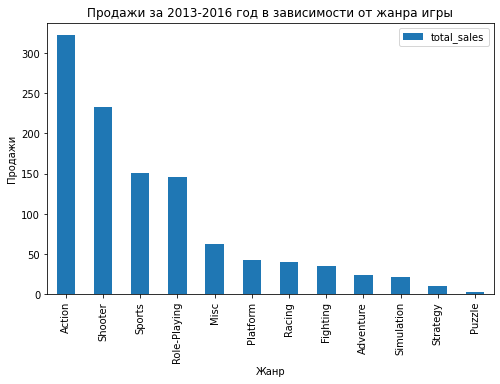

In [53]:
data_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum') \
            .sort_values(by='total_sales', ascending=False) \
            .plot(kind='bar', figsize=(8, 5),
                  title='Продажи за 2013-2016 год в зависимости от жанра игры',
                  xlabel='Жанр',
                  ylabel='Продажи');

Однако стоит изучить медианное распределение продаж в зависимости от жанра, так как на продажи может влиять не только сам жанр, но и платформа. Построю диаграммы.
    
</div>




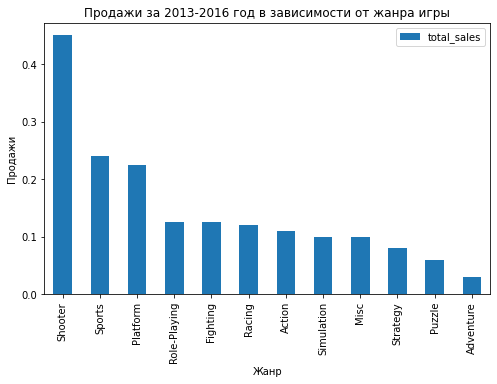

In [54]:
data_actual.pivot_table(index='genre', values='total_sales', aggfunc='median') \
            .sort_values(by='total_sales', ascending=False) \
            .plot(kind='bar', figsize=(8, 5),
                  title='Продажи за 2013-2016 год в зависимости от жанра игры',
                  xlabel='Жанр',
                  ylabel='Продажи');

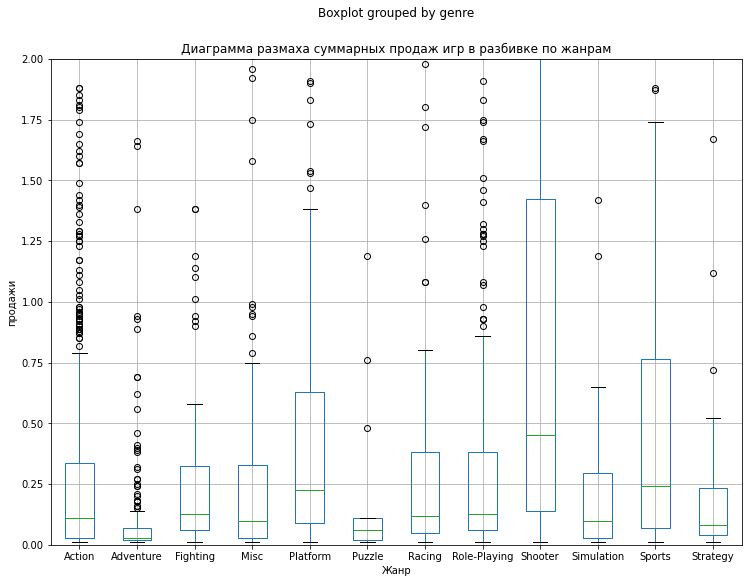

In [55]:
data_actual.boxplot(column=['total_sales'], by='genre', figsize=(12,9));


plt.ylim(0, 2)
plt.xlabel('Жанр');
plt.ylabel('продажи');
plt.title('Диаграмма размаха суммарных продаж игр в разбивке по жанрам');

И вправду, в медианных значениях наиболее продаваемые жанры: . Они наиболее устойчивы.
    
**Вывод:**

1. Популярные жанры: Action(боевик), Role-Playing (ролевые), Adventure (приключения), Sports(Спортивный симулятор), Shooter(стрелялка)
2. Продаваемые жанры: Shooter(стрелялка),  Sports(Спортивный симулятор), Platform (платформенные), Role-Playing (ролевые) и Fighting (драки)
    
Т.о популярные жанры не всегда являются продаваемыми.

</div>

### Шаг 4. Портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Сначала построю круговые диаграммы для 5-ти наиболее продаваемым платформам для каждого региона (Северная Америка, Европа и Япония). При этом исследование буду проводить за период с 2012 года по 2016 год, как наиболее актуальный период.

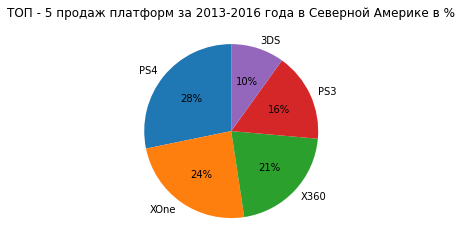

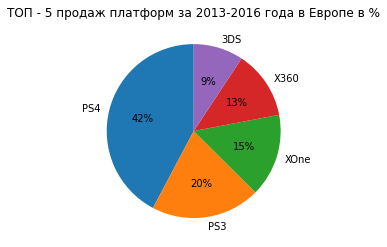

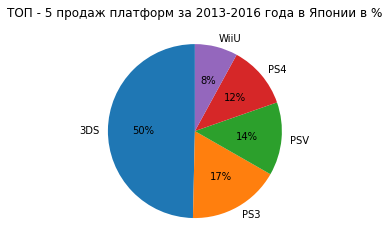

In [56]:
data_actual.pivot_table(index='platform', values='na_sales', aggfunc='sum') \
    .sort_values(by = 'na_sales', ascending = False).head(5) \
    .plot(kind='pie', y='na_sales', autopct='%1.0f%%', figsize=(4, 4),
          title='ТОП - 5 продаж платформ за 2013-2016 года в Северной Америке в %',
          ylabel='',
          legend=False, 
          startangle=90);

data_actual.pivot_table(index='platform', values='eu_sales', aggfunc='sum') \
    .sort_values(by = 'eu_sales', ascending = False).head(5) \
    .plot(kind='pie', y='eu_sales', autopct='%1.0f%%', figsize=(4, 4),
          title='ТОП - 5 продаж платформ за 2013-2016 года в Европе в %',
          ylabel='',
          legend=False, 
          startangle=90);

data_actual.pivot_table(index='platform', values='jp_sales', aggfunc='sum') \
    .sort_values(by = 'jp_sales', ascending = False).head(5) \
    .plot(kind='pie', y='jp_sales', autopct='%1.0f%%', figsize=(4, 4),
          title='ТОП - 5 продаж платформ за 2013-2016 года в Японии в %',
          ylabel='',
          legend=False, 
          startangle=90);

В Северной Америке самые продаваемые платформы: PS4 (28%), ХOne  Х360 и практически одинаково продаются (24% и 21% соответственно). Из 5 наиболее продаваемых платформ хуже всех продается 3DS (10%).

В Европе наоборот самые продаваемые платформы: PS4 (42%), PS3 (20%), а ХOne (15%) на третьем месте. Меньше всего продаж также у платформы 3DS (9%).

В Японии наблюдается совершенно другая картина распределения продаж по платформам. 3DS уже самая продаваемая платформа и имеет половину продаж (50%), на втором месте PS3 (17%), на третьем - PSV (14%). Меньше всех доля продаж у платформы WiiU (8%).

Далее для каждого региона изучу самые популярные жанры (ТОП-5 жанров) за период 2013-2016года.

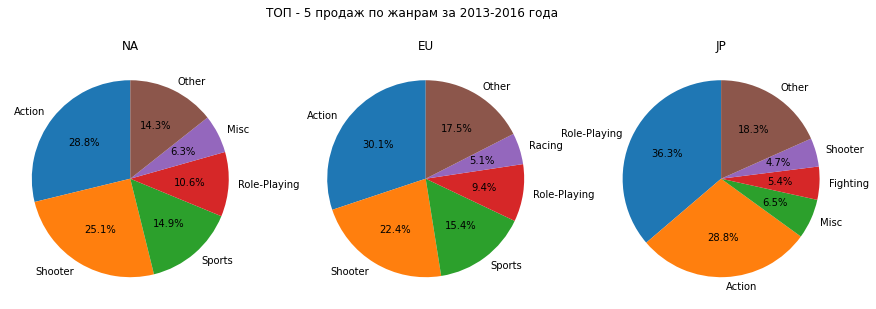

In [57]:
data_actual2 = data_actual.copy()
regions = data_actual2.columns[4:7]

# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('ТОП - 5 продаж по жанрам за 2013-2016 года')

for i in range(3):
    # выберем 5 самых продающих жанров
    df_i = (data_actual2.groupby('genre')[regions[i]].sum()\
           .reset_index()\
           .sort_values(regions[i], ascending=False, ignore_index=True).head(5))
    # занесем все остальные продажи в другие жанры
    df_i = df_i.append({'genre' : 'Other', regions[i]: data_actual2[regions[i]].sum() - df_i[regions[i]].sum()}, ignore_index=True)
    axs[i].pie(df_i[regions[i]], labels = df_i['genre'], autopct='%1.1f%%', startangle=90)
    # зададим название региона
    axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()    

В Северной Америке и Европе лидируют по продажам жанры боевик и стрелялка(шутер). А в Японии лидеры ролевая игра (36%) и также боевики. Низкая продаваемость в Северной Америке - разное; в Европе - гонки; в Японии - стрелялки.

Далее изучу влияет ли рейтинг ESRB на продажи в отдельном регионе, построю столбиковую диаграмму.

</div>

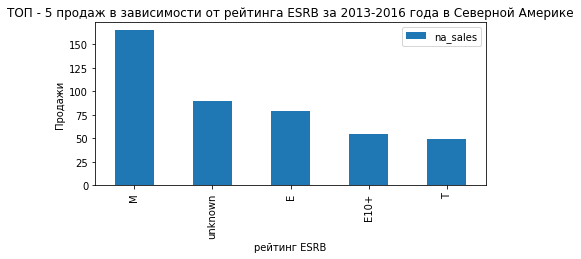

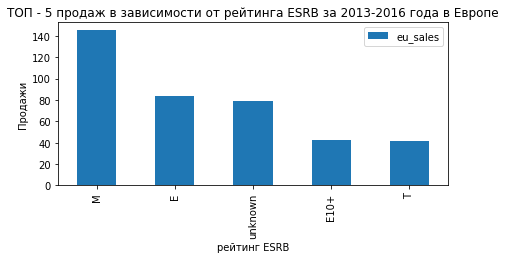

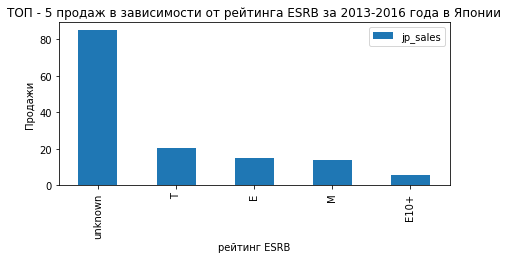

In [58]:
data_actual.pivot_table(index='rating', values='na_sales', aggfunc='sum') \
    .sort_values(by = 'na_sales', ascending = False).head(5) \
    .plot(kind='bar', figsize=(7, 3),
          title='ТОП - 5 продаж в зависимости от рейтинга ESRB за 2013-2016 года в Северной Америке',
          xlabel='рейтинг ESRB',
          ylabel='Продажи');

data_actual.pivot_table(index='rating', values='eu_sales', aggfunc='sum') \
    .sort_values(by = 'eu_sales', ascending = False).head(5) \
    .plot(kind='bar', figsize=(7, 3),
          title='ТОП - 5 продаж в зависимости от рейтинга ESRB за 2013-2016 года в Европе',
          xlabel='рейтинг ESRB',
          ylabel='Продажи');

data_actual.pivot_table(index='rating', values='jp_sales', aggfunc='sum') \
    .sort_values(by = 'jp_sales', ascending = False).head(5) \
    .plot(kind='bar', figsize=(7, 3),
          title='ТОП - 5 продаж в зависимости от рейтинга ESRB за 2013-2016 года в Японии',
          xlabel='рейтинг ESRB',
          ylabel='Продажи');

Известно, что на игры без рейтинга при предобработке данных была поставлена заглушка 'unknown', соответственно это игры не из США или Канады.

В Северной Америке и Европе самые продаваемый игры с рейтингом `M`, то есть для взрослых (от 17 лет и старше). В 2 раза меньше продаж, но все равно наиболее продаваемые игры с рейтингом `E` - для всех и 'unknown', то есть из другиих регионов. 

В Японии - лидируют игры из других регионов 'unknown', и в разы меньше продаж игр с рейтингом `E`; `T` - для подростков (от 13 лет и старше).

**Вывод:**

1. Самые продаваемые платформы в Северной Америке и Европе: ХOne, Х360, PS4. В Японии - 3DS, PS3, PSV.
2. В Северной Америке и Европе лидируют по продажам жанры боевик и стрелялка(шутер). А в Японии лидеры ролевая игра (44%) и также боевики. Низкая продаваемость в Северной Америке - разное; в Европе - гонки; в Японии - стрелялки.
3. В Северной Америке и Европе самые продаваемый игры с рейтингом для взрослых (от 17 лет и старше), для всех и игры не из США/Канады. В Японии - игры не из США/Канады, и рейтинги для всех и для подростков (от 13 лет и старше).

</div>


### Проверка гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;


    
Имеем две генеральных совокупности: платформа Xbox One и PC.

Сформулирую нулевую и двустороннюю альтернативную гипотезу:

```
H_0: Средний пользовательский рейтинг (user_score) платформы Xbox One = среднему пользовательскому рейтингу (user_score) платформы PC`
H_a: Средний пользовательский рейтинг (user_score) платформы Xbox One ≠ среднему пользовательскому рейтингу (user_score) платформы PC`
Критерий значимости возьму 0.05
```

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применю метод scipy.stats.ttest_ind(array1, array2).

Сначала создадам срезы по платформам. При этом анализирую данные за актуальный период. А также помню, что пропуски не были заполнены, поэтому для применения статистического метода они будут отброшены.

</div>


Анализ проведен для актуального периода 2013-2016 год.
    
Посчитаем дисперсии для совокупностей, чтобы определить параметр метода ttest.

</div>

In [59]:
# создаю отдельно выборки рейтинги платформ Xbox One и PC
XOne = data_actual.query('platform == "XOne"')['user_score']
PC = data_actual.query('platform == "PC"')['user_score']

In [60]:
print('Дисперсия по платформе XOne',np.var(XOne, ddof=1).round(2))
print('Дисперсия по платформе PC',np.var(PC, ddof=1).round(2))

Дисперсия по платформе XOne 1.91
Дисперсия по платформе PC 3.04


Поскольку дисперсия отличается, предположим, что в equal_var нужно использовать параметр False.

In [61]:

results = st.ttest_ind(XOne.dropna(), PC.dropna(), equal_var=False)

# alpha = задайте значение уровня значимости
alpha = .05

# вывод значения p-value на экран 
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Вывод: Значение p-value равно 15%. Таким образом, не получилось опровергнуть Нулевую гипотезу. То есть, Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Для проверки вывода посчитаю средние пользовательские рейтинги платформ Xbox One и PC и проверю одинаковые ли они.

In [62]:
print('Средний пользовательский рейтинг платформы XOne:', round(XOne.mean(), 1))
print('Средний пользовательский рейтинг платформы PC:', round(PC.mean(), 1))

Средний пользовательский рейтинг платформы XOne: 6.5
Средний пользовательский рейтинг платформы PC: 6.3


В целом средние значения рейтингов и справду практичеси одинаковые и отличаются только на несколько десятых. 

Проверю следующую гипотезу

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.



    
Имеем две генеральных совокупности: платформа Xbox One и PC.

Сформулирую нулевую и  двустороннюю альтернативную гипотезу:

```
H_0: Средний пользовательский рейтинг (user_score) жанра Action = среднему пользовательскому рейтингу (user_score) жанра Sports`
H_a: Средний пользовательский рейтинг (user_score) жанра Action ≠ среднему пользовательскому рейтингу (user_score) жанра Sports`
Критерий значимости возьму 0.05
```

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применю метод scipy.stats.ttest_ind(array1, array2).

Сначала создадам срезы по платформам. При этом анализирую данные за актуальный период. А также помню, что пропуски не были заполнены, поэтому для применения статистического метода они будут отброшены.

</div>



Анализ проведен для актуального периода 2013-2016 год.
    
Посчитаем дисперсии для совокупностей, чтобы определить параметр метода ttest.

</div>

In [63]:
# создаю отдельно выборки рейтинги жанров Action и Sports
Action = data_actual.query('genre == "Action"')['user_score']
Sports = data_actual.query('genre == "Sports"')['user_score']

In [64]:
print('Дисперсия по рейтингам Action',np.var(Action, ddof=1).round(2))
print('Дисперсия по рейтингам Sports',np.var(Sports, ddof=1).round(2))

Дисперсия по рейтингам Action 1.77
Дисперсия по рейтингам Sports 3.18


Поскольку дисперсия отличается, предположим, что в equal_var нужно использовать параметр False.

In [65]:
results = st.ttest_ind(Action.dropna(), Sports.dropna(), equal_var=False)

# alpha = задайте значение уровня значимости
alpha = .05

# вывод значения p-value на экран 
print('p-значение:', results.pvalue)

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод: Значение p-value менее 5%. Таким образом, Отвергаем нулевую гипотезу. То есть, с вероятностью менее 5% можно получить разные рейтинги двух жанров Action и Sports.

Для проверки вывода посчитаю средние пользовательские рейтинги жанров Action и Sports и проверю вправду ли они разные.

In [66]:
print('Средний пользовательский рейтинг жанра Action:', round(Action.mean(), 1))
print('Средний пользовательский рейтинг жанра Sports:', round(Sports.mean(), 1))

Средний пользовательский рейтинг жанра Action: 6.8
Средний пользовательский рейтинг жанра Sports: 5.2


Да, все корректно, рейтинги и вправду различаются. Несильно, всего на целые, но различаются. Гипотеза проверена и подтверждена.

## Общий вывод

Заказчик — интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Нужно выявить определяющие успешность игры закономерности. Результаты исследования позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Цель исследования** — выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данны данные до 2016 года и я планирую кампанию на 2017-й.

Необходимо провсти исследовательский анализ:
1. Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Как менялись продажи по платформам. Для платформ с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
3. Какие платформы лидируют по продажам, растут или падают? 
4. Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опиать результат.
5. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами.
6. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
7. Необходимо составить портрет пользователя каждого региона

Необходимо проверить гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Описание данных

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Обозначение рейтинга в столбце `Rating`:**
* `E` - для всех;
* `M` - для взрослых (от 17 лет и старше);
* `T` - для подростков (от 13 лет и старше);
* `E10+` - для всех (от 10 лет и старше);
* `K-A` - для детей и взрослых. Этот рейтинг использовался до 1998 года, когда он был переименован в E.
* `AO` - для взрослых (от 18 лет и старше);
* `EC` - для детей младшего возраста (от 3 лет и старше);
* `RP` - рейтинг ожидается. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу

## Во время предобработки данных:

1. Названия всех столбцов приведены к нижнему регистру;

2. В столбцах `year_of_release`, `name`, `genre` были удалены строки с пропусками. Таких строк было меньше 1-2%, поэтому их удаление допустимо;

3. В столбце `user_score` значение 'tbd' заменено на пустую строку. Пропуски в этом столбце не удалялись;

4. В столбце `critic_score` пропуски были оставлены;

5. В столбце `rating` пропуски заменены значением-флагом `unknown`;

6. В столбце `year_of_release` заменен тип данных float на int;

7. В столбце `user_score` заменен тип данных на float;

8. Создан столбец `total_sales` со значениями суммарных продаж во всех регионах.

9. Аномалий и дубликатов не выявлено.

## Во время исследовательского анализы были сформулированы следующие выводы:

1. ТОП-5 продаж за все время у платформ: PS2, X360, PS3, Wii, DS. 
2. В целом одна платформа может успешно продаваться в течении 10-25 лет.
    
3. Для прогноза рекламной компании лучше ориентироватеься на наиболее продаваемые платформы за 2013-2016 года: PS4, XOne. Также можно рассматривать платформу 3DS, однако ее показатели будут хуже чем у PS4, XOne.
    
4. Медианная величина продаж наибольшая у платформы X360, XOne, WiiU, PS3 и PS4. У всех данных имеется положительная скошенность, а также выбросы.
5. Выявлена умеренная взаимосвязь между продажами и оценками критиков для платформы PS4. Значит отзывы критиков могут частично повлиять на продажи платформы. Однако, также выявлено, что отзывы пользователей не влияют на продажи.
6. Предыдущий вывод подтвердился и для других платформ.
   
7. Популярные жанры: Action(боевик), Role-Playing (ролевые), Adventure (приключения), Sports(Спортивный симулятор), Shooter(стрелялка)
8. Продаваемые жанры: Shooter(стрелялка), Sports(Спортивный симулятор), Platform (платформенные), Role-Playing (ролевые) и Fighting (драки).
</div>

## Во время составления портрета пользователя по регионам были сформулированы следующие выводы:

   
1. Самые продаваемые платформы в Северной Америке и Европе: ХOne, Х360, PS4. В Японии - 3DS, PS3, PSV.
2. В Северной Америке и Европе лидируют по продажам жанры боевик и стрелялка(шутер). А в Японии лидеры ролевая игра (44%) и также боевики. Низкая продаваемость в Северной Америке - разное; в Европе - гонки; в Японии - стрелялки.
3. В Северной Америке и Европе самые продаваемый игры с рейтингом для взрослых (от 17 лет и старше), для всех и игры не из США/Канады. В Японии - игры не из США/Канады, и рейтинги для всех и для подростков (от 13 лет и старше).
</div>

## Выводы после проверки гипотез:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные


 
## Рекомендации:
1. Платфоормы для рекламы: PS4, XOne
2. Жанры: Shooter(стрелялка), Sports(Спортивный симулятор)
3. Рейтинг ESRB платформ для рекламы в Северной Америке и Европе - М, в Японии - Т
4. На отзывы пользователей можно не обращать внимая, так как они не влияют на продажи. На отзывы критиков смотреть можно, но также особо заострять внимание не стоит.
</div>